## Virtual Environment for Individual-Based Modeling

This virtual environment is based on an Agent-Based Modeling system using some assumptions that are derived from previousobservations of waterbirds’ behaviors within some habitats in the tropics.

Created on March 31, 2019 by Ralph Florent <r.florent@jacobs-university.de>

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
=> START: Processing random movements based on prob dist
--- snapshot stats: {'lagoon-orange-sm': {'short-legged': 7, 'long-legged': 6}, 'lagoon-orange-lg': {'short-legged': 13, 'long-legged': 10}, 'lagoon-blue': {'short-legged': 0, 'long-legged': 4}, 'lagoon-green': {'short-legged': 0, 'long-legged': 0}}
--- process update: 1
--- snapshot stats: {'lagoon-orange-sm': {'short-legged': 3, 'long-legged': 3}, 'lagoon-orange-lg': {'short-legged': 17, 'long-legged': 12}, 'lagoon-blue': {'short-legged': 0, 'long-legged': 1}, 'lagoon-green': {'short-legged': 0, 'long-legged': 4}}
--- process update: 2
--- snapshot stats: {'lagoon-orange-sm': {'short-legged': 6, 'long-legged': 9}, 'lagoon-orange-lg': {'short-legged': 14, 'long-legged': 9}, 'lagoon-blue': {'short-legged': 0, 'long-legged': 0}, 'lagoon-green': {'short-legged': 0, 'long-legged': 2}

<Figure size 432x288 with 0 Axes>

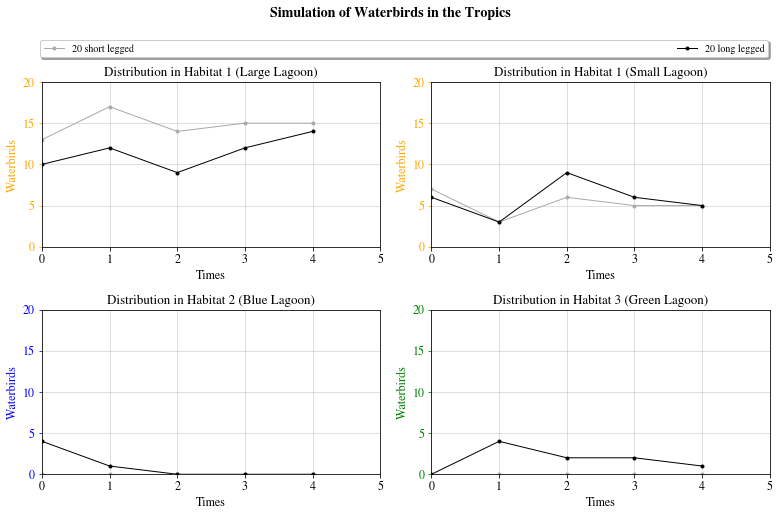

In [14]:
# Virtual Environment for Individual-Based Modeling (IBM)
#
# Created on March 31, 2019
#
# Authors:
#   Ralph Florent <r.florent@jacobs-university.de>
#   Davi Tavares <davi.tavares@leibniz-zmt.de>
#   Agostino Merico <a.merico@jacobs-university.de>
#
# Main entry point for the application

# ==============================================================================
# START: Preamble
# ==============================================================================
%reset

# -*- coding: utf-8 -*-
import config
import constants as CONST
from core import initialize, observe, update
from helpers import plot_figure, make_gif

# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# reload external python modules
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


# ==============================================================================
# END: Preamble
# ==============================================================================

# ==============================================================================
# START: Application
# ==============================================================================

# main entry point for the application
# TODO: proper docs
def application():
    
    # pre-conditions
    config.init() # initialize internal config for the app
    time = 0 # define stopwatch for the process
    
     # process for t times
    print('=> START: Processing random movements based on prob dist')
    habitats, agents = initialize()
    observe(habitats, agents, time)
    
    for time in range(1, CONST.PROCESSING_TIME):
        agents = update(habitats, agents, time) # override agents when being updated
        observe(habitats, agents, time)
    
    print('=> END: Processing random movements based on prob dist')
    
    # post-conditions
    make_gif(CONST.SAMPLE_DIR, 'image.gif', CONST.STORE['images'])
    plot_figure()

    
# run application
application()

# ==============================================================================
# END: Application
# ==============================================================================